In [1]:
%load_ext autoreload
import os

os.chdir("../../../")
FOLDER_FIGURES = "figures/telework_index_estimation"

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler



classifier_scaler_mapping = {
    "LogisticRegression": StandardScaler(),   # Scale-sensitive: use StandardScaler
    "SVC": StandardScaler(),                    # Scale-sensitive: use StandardScaler
    "KNeighborsClassifier": StandardScaler(),   # Distance-based, needs scaling
    "DecisionTreeClassifier": None,             # Tree-based: no scaling needed
    "RandomForestClassifier": None,             # Tree-based: no scaling needed
    "GradientBoostingClassifier": None          # Tree-based: no scaling needed
}

regressor_scaler_mapping = {
    "LinearRegression": StandardScaler(),       # Scale-sensitive: use StandardScaler
    "Ridge": StandardScaler(),                    # Scale-sensitive: use StandardScaler
    "SVR": StandardScaler(),                      # Scale-sensitive: use StandardScaler
    "KNeighborsRegressor": StandardScaler(),      # Distance-based: use StandardScaler
    "DecisionTreeRegressor": None,                # Tree-based: no scaling needed
    "RandomForestRegressor": None,                # Tree-based: no scaling needed
    "GradientBoostingRegressor": None             # Tree-based: no scaling needed
}

# Import model constructors
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor,
    ExtraTreesClassifier, ExtraTreesRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression


from wfh_share_estimation import *
import matplotlib as mpl
files  = os.listdir('experiments/results')
files = [f for f in files if f.endswith('.csv')]

classifier_mapping = {
    "RandomForest": RandomForestClassifier,
    "GradientBoosting": GradientBoostingClassifier,
    "ExtraTrees": ExtraTreesClassifier,
    "XGB": XGBClassifier,
    "SVC": SVC,
    "LogisticRegression": LogisticRegression,
    "KNeighbors": KNeighborsClassifier,
    # add additional classifier types if needed
}

regressor_mapping = {
    "RandomForest": RandomForestRegressor,
    "GradientBoosting": GradientBoostingRegressor,
    "ExtraTrees": ExtraTreesRegressor,
    "XGB": XGBRegressor,
    "SVR": SVR,
    "KNeighbors": KNeighborsRegressor,
    "LinearRegression": LinearRegression,
    # add additional regressor types if needed
}

results = pd.DataFrame()
for f in files:
    df = pd.read_csv('experiments/results/' + f)
    df['file'] = f
    results = pd.concat([results, df])

In [ ]:
results.sort_values('correlation_non_zero', ascending=False).head(10)

,evaluation_strategy,n_bootstrap,classifier_type,classifier_params,zero_threshold,regressor_type,regressor_params,f1,mae,mae_non_zero,correlation,correlation_non_zero,file
270,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914337,0.050161,0.105902,0.853330,0.719999,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914493,0.050219,0.105955,0.853332,0.719956,ExtraTrees_clf_SVR_reg_20250217181606.csv
630,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915506,0.050177,0.106077,0.853207,0.719885,ExtraTrees_clf_SVR_reg_20250217181606.csv
570,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 5, 'max_fea...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.906586,0.050617,0.106327,0.852248,0.719841,ExtraTrees_clf_SVR_reg_20250217181606.csv
690,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914402,0.050287,0.106115,0.853009,0.719799,ExtraTrees_clf_SVR_reg_20250217181606.csv
450,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915222,0.050235,0.106005,0.853122,0.719795,ExtraTrees_clf_SVR_reg_20250217181606.csv
270,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915269,0.050098,0.106336,0.853249,0.719718,RandomForest_clf_SVR_reg_20250217221725.csv
390,bootstrap,100,RandomForest,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.916433,0.050082,0.106412,0.853273,0.719702,RandomForest_clf_SVR_reg_20250217221725.csv
90,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.912046,0.050400,0.106064,0.852884,0.719680,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915258,0.050106,0.106349,0.853228,0.719665,RandomForest_clf_SVR_reg_20250217221725.csv


In [3]:
# Select the experiment with the best performance in non-zero (by correlation_non_zero)
(
    evaluation_strategy_non_zero,
    n_bootstrap_non_zero,
    classifier_type_non_zero,
    classifier_params_non_zero,
    zero_threshold_non_zero,
    regressor_type_non_zero,
    regressor_params_non_zero,
    f1_non_zero,
    mae,               # corresponds to mae; you could rename it if desired
    mae_non_zero,      # already contains non_zero in its name
    correlation,
    correlation_non_zero,
    file_name_non_zero
) = results.sort_values('correlation_non_zero', ascending=False).iloc[0].values

# Select and save the best classifier experiment by sorting by 'f1'
(
    evaluation_strategy_f1,
    n_bootstrap_f1,
    classifier_type_f1,
    classifier_params_f1,
    zero_threshold_f1,
    regressor_type_f1,
    regressor_params_f1,
    f1_f1,
    mae_f1,
    mae_non_zero_f1,
    correlation_f1,
    correlation_non_zero_f1,
    file_name_f1
) = results.sort_values('f1', ascending=False).iloc[0].values

In [4]:
data_list = ['WORK_ACTIVITIES', 'WORK_CONTEXT']
metric = ['importance', 'context']
data_store = DataStore(data_list = data_list, 
                    metric=metric) 

Zero-Class F1: 0.889
Non-Zero MAE: 0.146 Correlation (Non-Zero): 0.658
Overall MAE: 0.081 Correlation: 0.808
R-squared: 0.58 R-squared (Non-Zero): 0.265


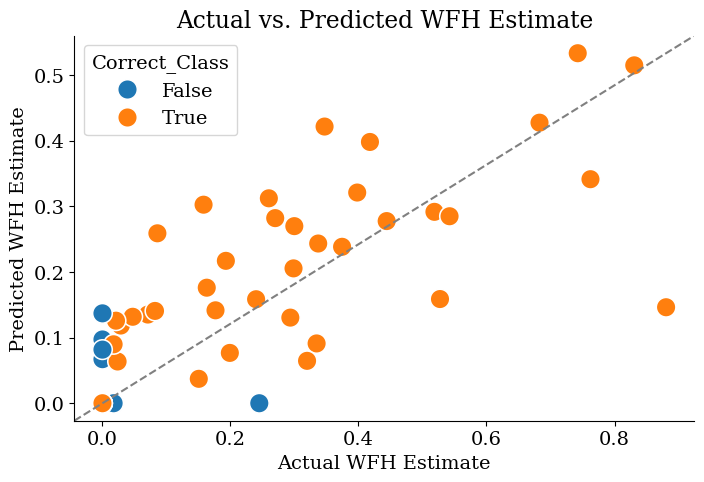

In [5]:
%autoreload 2
from wfh_share_estimation import ModelPipeline

mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 14

classifier_model = classifier_mapping[classifier_type_f1](C=0.8, kernel='rbf', gamma=0.005, probability=True)
classifier_scaler = classifier_scaler_mapping[classifier_model.__class__.__name__]
regressor_model = regressor_mapping[regressor_type_non_zero](C=0.8, kernel='rbf', epsilon = 0.1)
regressor_scaler = regressor_scaler_mapping[regressor_model.__class__.__name__]

pipeline = ModelPipeline(
            data=data_store, 
            classifier_model=classifier_model,
            classifier_scaler=classifier_scaler,
            regressor_model=regressor_model,
            regressor_scaler=regressor_scaler,
            zero_threshold=zero_threshold_f1
)

pipeline.train()
pipeline.evaluate()
pipeline.plot_manager.show_plot("test_prediction")

In [6]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

# Assume you have already trained:
#   - classifier (an SVC with RBF kernel)
#   - regressor (an SVR with RBF kernel)
# and you have your training and test sets: X_train, X_test, y_train, y_test,
# along with a list of feature names: feature_names

###########################################
# 1. Permutation Importance
###########################################

# For the classifier: using accuracy as the metric
perm_importance_clf = permutation_importance(
    pipeline.calibrated_classifier, pipeline.data.X_test, pipeline.data.y_test == 0, scoring='accuracy', n_repeats=10, random_state=42
)
sorted_idx_clf = perm_importance_clf.importances_mean.argsort()


In [7]:
feature_names = pipeline.data.X_test.get_content_model().columns

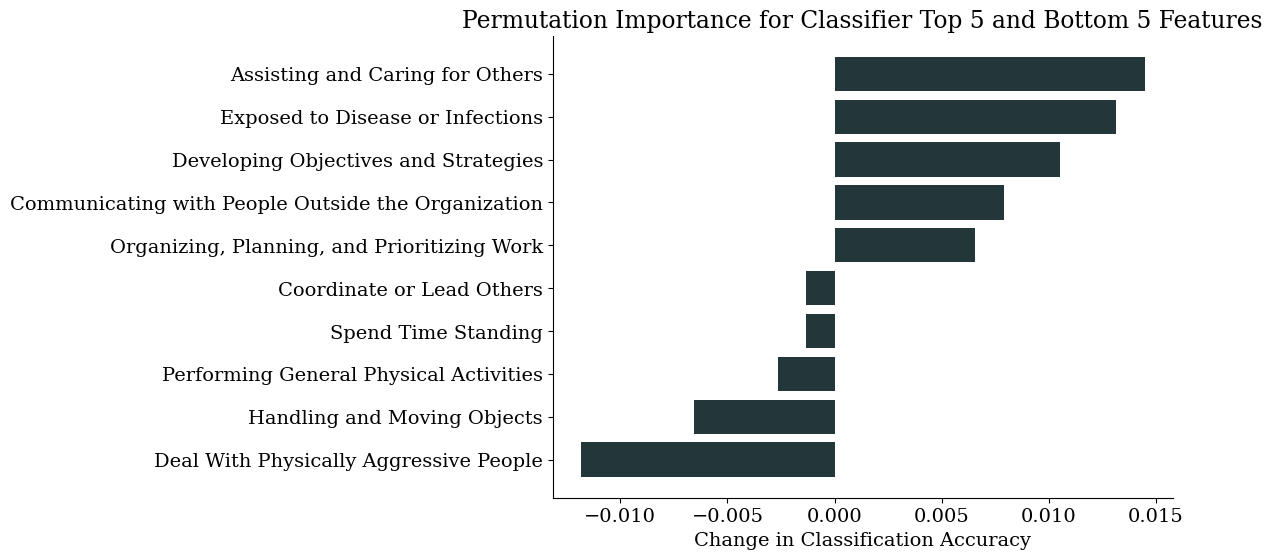

In [15]:
# Keep bottom 5 features and top 5 features to plot
sorted_idx_clf_plot = np.concatenate([sorted_idx_clf[:5], sorted_idx_clf[-5:]]) 
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx_clf_plot)), perm_importance_clf.importances_mean[sorted_idx_clf_plot], align='center', color="#23373B")
plt.yticks(range(len(sorted_idx_clf_plot)), np.array(feature_names)[sorted_idx_clf_plot])
plt.xlabel("Change in Classification Accuracy")
plt.title("Permutation Importance for Classifier Top 5 and Bottom 5 Features")
sns.despine()
# plt.show()
# Save the figure in pdf format to include in manuscript
plt.savefig(f"{FOLDER_FIGURES}/permutation_importance_classifier.pdf", format="pdf", dpi=300, bbox_inches="tight")


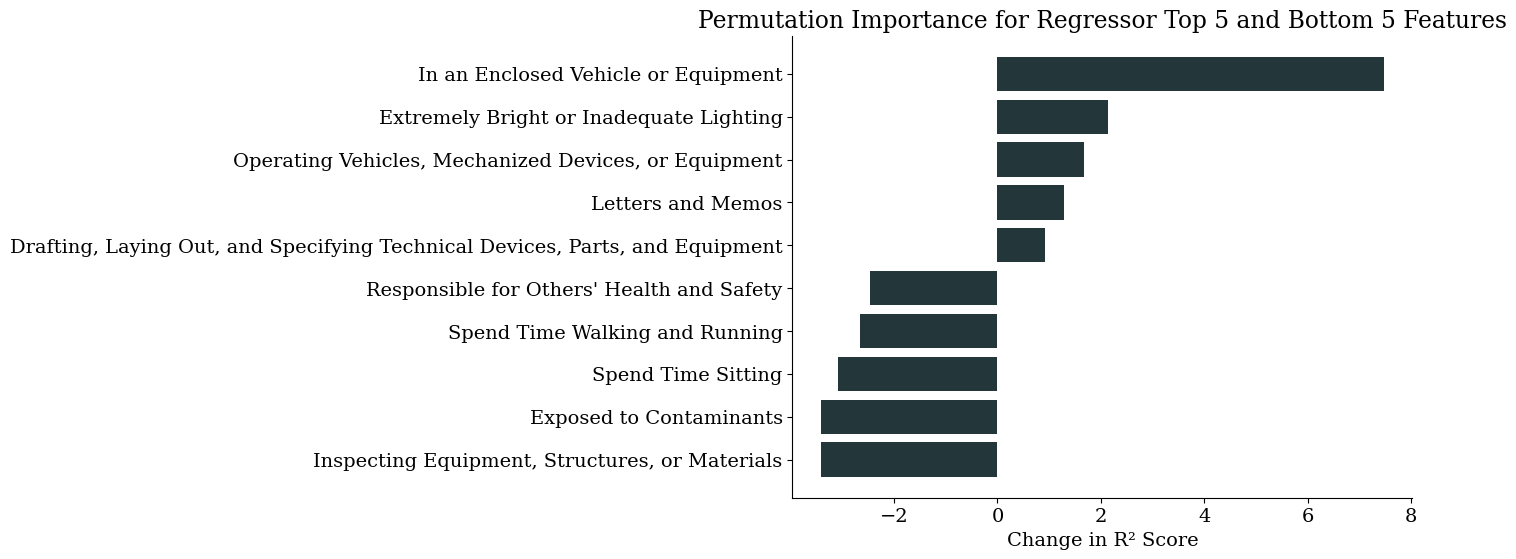

In [17]:
# For the regressor: using R² as the metric (you could also use negative RMSE)
perm_importance_reg = permutation_importance(
    pipeline.regressor_model, pipeline.data.X_test.loc[pipeline.data.y_test != 0], pipeline.data.y_test[pipeline.data.y_test != 0], scoring='r2', n_repeats=10, random_state=42
)

sorted_idx_reg = perm_importance_reg.importances_mean.argsort()
sorted_idx_reg_plot = np.concatenate([sorted_idx_reg[:5], sorted_idx_reg[-5:]])
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx_reg_plot)), perm_importance_reg.importances_mean[sorted_idx_reg_plot], align='center', color="#23373B")
plt.yticks(range(len(sorted_idx_reg_plot)), np.array(feature_names)[sorted_idx_reg_plot])
plt.xlabel("Change in R² Score")
plt.title("Permutation Importance for Regressor Top 5 and Bottom 5 Features")
sns.despine()
# Save the figure in pdf format to include in manuscript
plt.savefig(f"{FOLDER_FIGURES}/permutation_importance_regressor.pdf",format="pdf", dpi=300, bbox_inches="tight")

In [18]:
# ###########################################
# # 2. SHAP Values (SHapley Additive exPlanations)
# ###########################################

# # Note: For non-tree models (like SVC/SVR with RBF), KernelExplainer is appropriate.
# # Be aware that KernelExplainer can be computationally intensive.

# # For the classifier: using the decision_function as our prediction function
# # (for binary classification, this returns the distance from the decision boundary)
# explainer_clf = shap.KernelExplainer(
#     pipeline.calibrated_classifier.decision_function, shap.sample(pipeline.data.X_train, 100), link="logit"
# )


In [ ]:
# shap_values_clf = explainer_clf.shap_values(X_test)
# # Create a summary beeswarm plot for the classifier:
# shap.summary_plot(shap_values_clf, X_test, feature_names=feature_names, show=True)


In [19]:
# # For the regressor: using predict
# explainer_reg = shap.KernelExplainer(
#     pipeline.regressor.predict, shap.sample(pipeline.data.X_train, 100).values
# )

In [ ]:

# shap_values_reg = explainer_reg.shap_values(X_test)
# # Create a summary beeswarm plot for the regressor:
# shap.summary_plot(shap_values_reg, X_test, feature_names=feature_names, show=True)

In [20]:

# ###########################################
# # 3. Partial Dependence Plots (PDPs)
# ###########################################

# # Here we show an example for one selected feature.
# # You can loop through features or select a subset as needed.
# feature_index = sorted_idx_clf_plot  # Replace with the index (or list of indices) of the feature of interest

# # For the regressor:
# for feat_idx in feature_index:
#     fig, ax = plt.subplots(figsize=(8, 6))
#     PartialDependenceDisplay.from_estimator(pipeline.regressor, pipeline.data.X_test, [feat_idx], ax=ax)
#     ax.set_title(f"Partial Dependence Plot for: {feature_names[feat_idx]} (Regressor)")
#     plt.show()


In [21]:

# # Optionally, for the classifier (using probability estimates or decision function)
# feature_index = sorted_idx_clf_plot  # Replace with the index (or list of indices) of the feature of interest
# for feat_idx in feature_index:
#     fig, ax = plt.subplots(figsize=(8, 6))
#     PartialDependenceDisplay.from_estimator(pipeline.calibrated_classifier, pipeline.data.X_test, [feat_idx], ax=ax)
#     ax.set_title(f"Partial Dependence Plot for: {feature_names[feat_idx]} (Classifier)")
#     plt.show()


Zero-Class F1: 0.901
Non-Zero MAE: 0.112 Correlation (Non-Zero): 0.718
Overall MAE: 0.063 Correlation: 0.833
R-squared: 0.682 R-squared (Non-Zero): 0.456


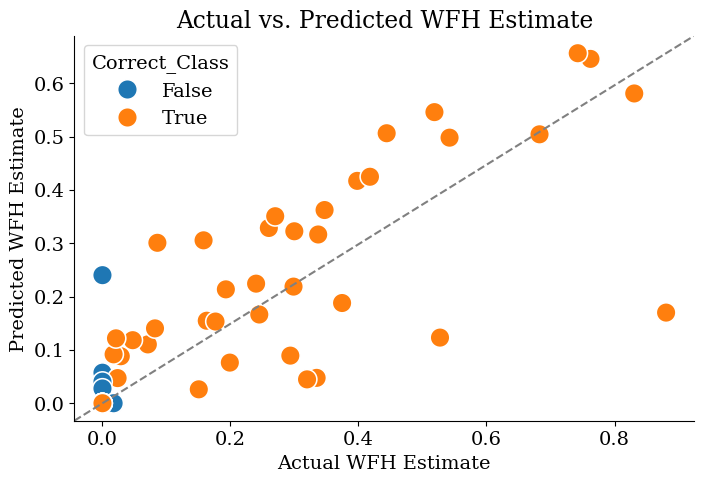

In [36]:
pipeline = ModelPipeline(
            data=data_store, 
            classifier_model=classifier_mapping[classifier_type_f1](C=3.0, kernel='rbf', gamma=0.001, probability=True),
            regressor_model=regressor_mapping[regressor_type_non_zero](C=6.8, kernel='rbf', epsilon = 0.001),
            zero_threshold=0.6
)

pipeline.train()
pipeline.evaluate()
pipeline.plot_manager.show_plot("test_prediction")

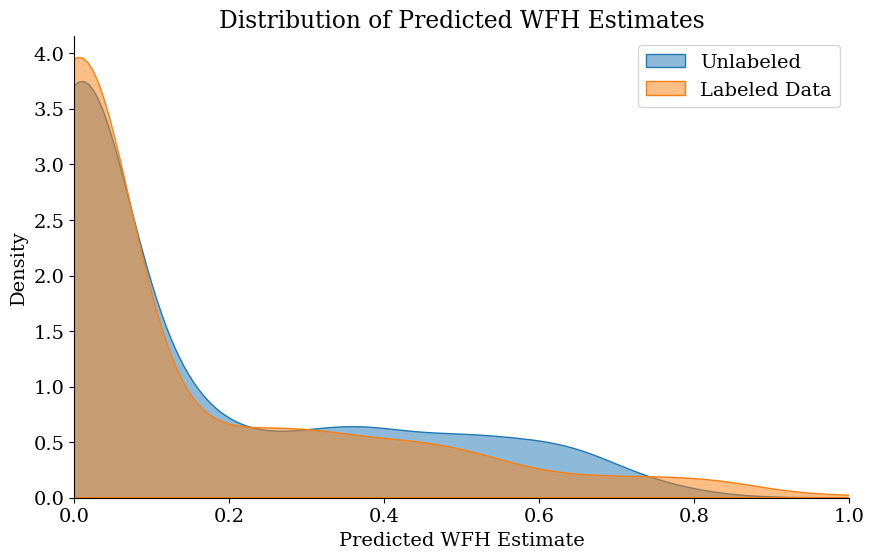

In [37]:
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")

In [41]:
fig, ax = pipeline.plot_manager.get_plot('test_prediction')
fig = ax.get_figure()
# Save the figure in pdf format to include in manuscript
fig.savefig(f"{FOLDER_FIGURES}/test_prediction.pdf", format="pdf", dpi=300, bbox_inches="tight")

In [43]:
fig, ax = pipeline.plot_manager.get_plot('unlabeled_prediction')
# Save the figure in pdf format to include in manuscript
fig.savefig(f"{FOLDER_FIGURES}/unlabeled_prediction.pdf", format="pdf", dpi=300, bbox_inches="tight")

In [35]:
fig, ax = pipeline.plot_manager.get_plot('unlabeled_prediction')

<Axes: xlabel='ESTIMATE_WFH_ABLE'>

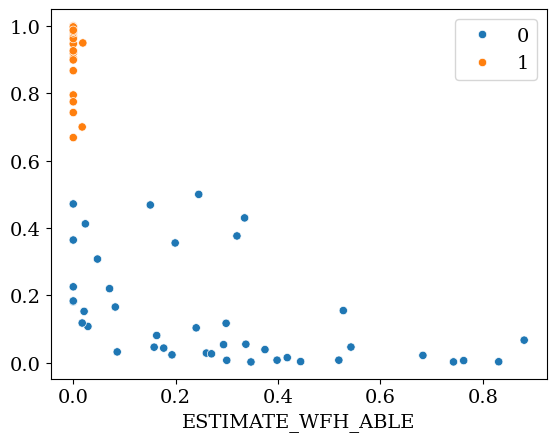

In [11]:
pipeline = ModelPipeline(
            data=data_store, 
            classifier_model=classifier_mapping[classifier_type_f1](C=3.0, kernel='rbf', gamma=0.001, probability=True),
            regressor_model=regressor_mapping[regressor_type_non_zero](C=6.8, kernel='rbf', epsilon = 0.001),
            zero_threshold=0.6
)

pipeline.train()

X_test = pipeline.data.X_test
y_test = pipeline.data.y_test
iz_test = pipeline.data.iz_test

# Stage 1: Use the classifier to predict zeros.
zero_probs = pipeline.calibrated_classifier.predict_proba(X_test)[:, 1]
predicted_zero = (zero_probs > pipeline.zero_threshold).astype(int)

sns.scatterplot(x=y_test, y=zero_probs, hue=predicted_zero)

<Axes: xlabel='ESTIMATE_WFH_ABLE'>

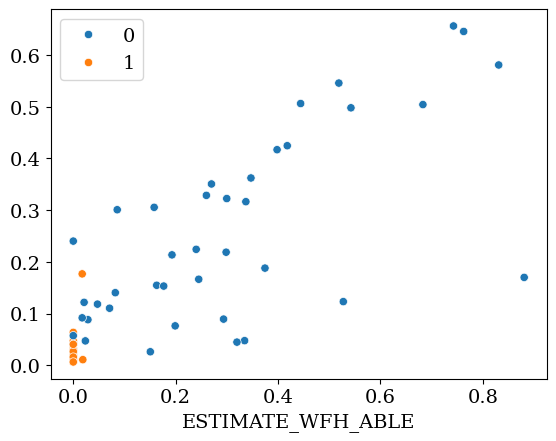

In [12]:
y_nz_pred_norm = pipeline.regressor.predict(X_test)
if pipeline.normalize == "logit":
    y_nz_pred = 1 / (1 + np.exp(-y_nz_pred_norm))  # Inverse logit
else:
    y_nz_pred = y_nz_pred_norm

sns.scatterplot(x=y_test, y=y_nz_pred, hue=predicted_zero)

In [14]:
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")
# Save the figure in pdf format to include in manuscript
plt.savefig(f"{FOLDER_FIGURES}/unlabeled_prediction.pdf", format="pdf", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

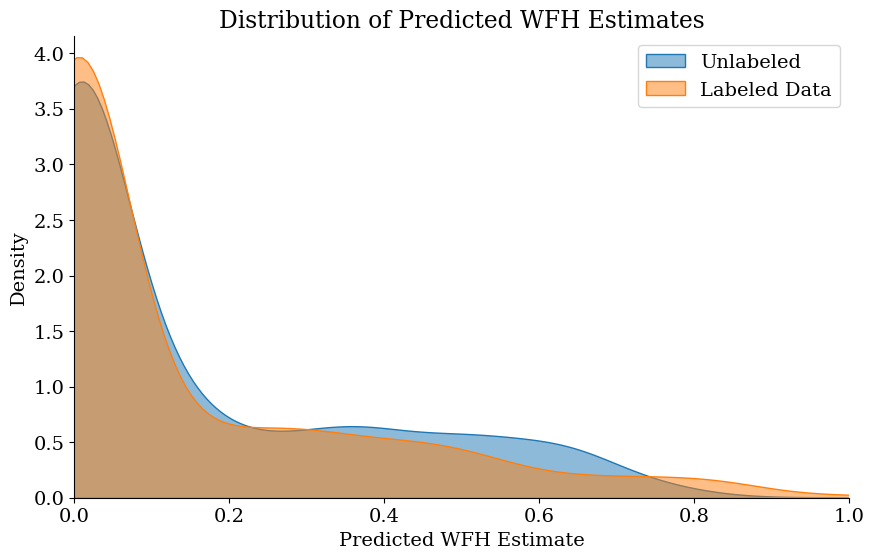

In [ ]:
# Retrain the model with all the data
pipeline.train(include_test=True)
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")

In [ ]:
# Unlabelled data
unlabeled = pipeline.data.unlabeled_data[["ESTIMATE_WFH_ABLE"]]

top_wfh = unlabeled.sort_values('ESTIMATE_WFH_ABLE', ascending=False).head(10)
non_wfh = unlabeled[unlabeled['ESTIMATE_WFH_ABLE'] == 0]

In [ ]:
top_wfh.get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Bioinformatics Scientists,19-1029.01,0.793872
Treasurers and Controllers,11-3031.01,0.771208
Investment Fund Managers,11-3031.03,0.762939
Computer Hardware Engineers,17-2061.00,0.751646
Database Architects,15-1243.00,0.743802
Remote Sensing Scientists and Technologists,19-2099.01,0.713083
Clinical Data Managers,15-2051.02,0.703917
Real Estate Brokers,41-9021.00,0.692986
Web Administrators,15-1299.01,0.691899


In [ ]:
non_wfh.sample(10).get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Postal Service Mail Carriers,43-5052.00,0.0
"Loading and Moving Machine Operators, Underground Mining",47-5044.00,0.0
Endoscopy Technicians,31-9099.02,0.0
Models,41-9012.00,0.0
Medical Appliance Technicians,51-9082.00,0.0
"Graders and Sorters, Agricultural Products",45-2041.00,0.0
Urologists,29-1229.03,0.0
Fish and Game Wardens,33-3031.00,0.0
Automotive and Watercraft Service Attendants,53-6031.00,0.0


In [ ]:
pipeline.data.labeled_data[["ESTIMATE_WFH_ABLE"]].sort_values('ESTIMATE_WFH_ABLE', ascending=False).head(10).get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Web Developers,15-1254.00,1.000000
"Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products",41-4011.00,0.880597
Market Research Analysts and Marketing Specialists,13-1161.00,0.839552
Lawyers,23-1011.00,0.834577
"Compensation, Benefits, and Job Analysis Specialists",13-1141.00,0.830846
Fundraisers,13-1131.00,0.830846
"Computer Science Teachers, Postsecondary",25-1021.00,0.827114
Computer and Information Systems Managers,11-3021.00,0.807214
Computer Programmers,15-1251.00,0.762438


In [ ]:
# Load ONET-SOC crosswalk
onet_soc = pd.read_csv('data/aux_and_croswalks/onet_soc_xwalk.csv', usecols=['ONET_SOC_CODE', 'OCC_CODE']).set_index('ONET_SOC_CODE')
onet_soc

,OCC_CODE
ONET_SOC_CODE,
11-1011.00,11-1011
11-1011.03,11-1011
11-1021.00,11-1021
11-1031.00,11-1031
11-2011.00,11-2011
...,...
55-3014.00,55-3014
55-3015.00,55-3015
55-3016.00,55-3016


In [ ]:
d = pd.concat([
    pipeline.data.labeled_data[["ESTIMATE_WFH_ABLE"]],
    pipeline.data.unlabeled_data[["ESTIMATE_WFH_ABLE"]]
])

d.merge(onet_soc, left_index=True, right_index=True).to_csv('/project/high_tech_ind/WFH/WFH/data/results/wfh_estimates.csv')